In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\shail\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv(r'C:\Users\shail\Downloads\congnizfy.csv')

In [4]:
data.head(6)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336


In [5]:
data.shape

(9551, 21)

In [6]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
data.drop(index = data.loc[data['Rating text']== 'not rated', :].index.tolist() , inplace = True)

# Top Cuisines

In [11]:
data['Cuisines'] =data['Cuisines'].astype(str)

lis = []
for i in data['Cuisines']:
    lis.append(i)
cuisine_list = []

for item in lis:
    cuisine_list.extend(item.split(','))

In [12]:
print('Three Most common cuisine type :--\n')
cuisine_data = pd.Series(cuisine_list , name = 'Cuisines')
cuisine_data.value_counts().reset_index().head(3)

Three Most common cuisine type :--



,Cuisines,count
0,North Indian,2992
1,Chinese,1880
2,Fast Food,1314


In [13]:
print("Out of the 9551 restaurants :--",round(cuisine_data.reset_index().loc[cuisine_data.reset_index()['Cuisines'].isin(cuisine_data.value_counts().reset_index().head(3)['Cuisines'].tolist()) , 'index'].count()
       / len(cuisine_data.reset_index().index),3) *100,"% deliver one of the top 3 cuisine.")

Out of the 9551 restaurants :-- 31.4 % deliver one of the top 3 cuisine.


In [14]:
cuisine_data = cuisine_data.reset_index()

North_India = cuisine_data.loc[cuisine_data['Cuisines'] == 'North Indian' , : ]
print("North Indian food is served by :--",round(North_India['index'].count()/cuisine_data['index'].count(),3)*100,'%  restaurants.')

Chinese = cuisine_data.loc[cuisine_data['Cuisines'] == 'Chinese' , : ]
print("Chinese food is served by :--",round(Chinese['index'].count()/cuisine_data['index'].count(),4)*100,'%  restaurants.')

Fast_Food = cuisine_data.loc[cuisine_data['Cuisines'] == 'Fast Food' , : ]
print("Fast Food food is served by :--",round(Fast_Food['index'].count()/cuisine_data['index'].count(),4)*100,'%  restaurants.')            

North Indian food is served by :-- 15.2 %  restaurants.
Chinese food is served by :-- 4.34 %  restaurants.
Fast Food food is served by :-- 3.4099999999999997 %  restaurants.


In [15]:
print('The city with highest number of restaurant is :--\n')

data.groupby('City')['Restaurant ID'].count().reset_index().sort_values('Restaurant ID' , ascending = False).head(1).rename(columns = {'Restaurant ID':'No of Restaurant'})

The city with highest number of restaurant is :--



,City,No of Restaurant
88,New Delhi,5473


In [16]:
avg_rating = data.groupby('City')['Aggregate rating'].mean().reset_index().rename(columns = {"Aggregate rating" : "Average rating"})
print('Average rating for restaurants in each city :-- \n')
avg_rating.sort_values('Average rating' , ascending= False).head(5)

Average rating for restaurants in each city :-- 



,City,Average rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000


In [17]:
print("The city with the highest average rating is :--" ,
avg_rating.sort_values('Average rating' , ascending = False).head(1)['City'].tolist()[-1])

The city with the highest average rating is :-- Inner City


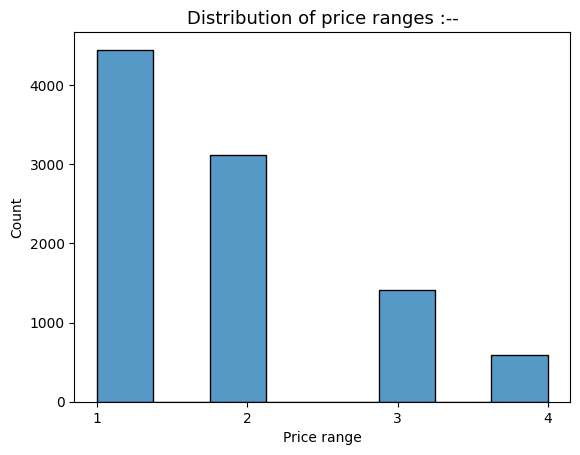

In [18]:
sns.histplot(data = data['Price range'] , bins= 8)
plt.xticks([1,2,3,4])
plt.title('Distribution of price ranges :--' , fontdict= dict(size = 13))
plt.show()

In [19]:
print("Percentage of resturants with 1 Price range :--" , 
      round(len(data.loc[data['Price range'] == 1 , 'Price range']) / len(data.index) * 100 , 3) , "%")
print("Percentage of resturants with 2 Price range :--" , 
      round(len(data.loc[data['Price range'] == 2 , 'Price range']) / len(data.index) * 100 , 3) , "%")
print("Percentage of resturants with 3 Price range :--" , 
      round(len(data.loc[data['Price range'] == 3 , 'Price range']) / len(data.index) * 100 , 3) , "%")
print("Percentage of resturants with 4 Price range :--" ,
      round(len(data.loc[data['Price range'] == 4 , 'Price range']) / len(data.index) * 100 , 3) , "%")
fig = px.pie(data_frame= data['Price range'].value_counts().reset_index() , values= 'count' , labels= 'Price range' ,
             hover_name= 'Price range' , title= "Analyzing Price range percentage", names= "Price range" )
fig.update_layout(title_x = 0.5 , height = 450 , showlegend = True , width = 700 , legend=dict(title='Price Range'))
fig.show()

Percentage of resturants with 1 Price range :-- 46.529 %
Percentage of resturants with 2 Price range :-- 32.593 %
Percentage of resturants with 3 Price range :-- 14.742 %
Percentage of resturants with 4 Price range :-- 6.135 %


In [20]:
print('the percentage of restaurants that offer online delivery is :--' ,
round(len(data.loc[data['Has Online delivery'] == 'Yes' , 'Restaurant ID' ].tolist())/len(data['Restaurant ID'].tolist()) *100 , 3) , '%')

the percentage of restaurants that offer online delivery is :-- 25.662 %


In [21]:
print('Average rating of restaurant with online delivery is : --',round(data.loc[data['Has Online delivery']=='Yes','Aggregate rating'].mean(),2),"\n")

print('Average rating of restaurant without online delivery is : --',round(data.loc[data['Has Online delivery']=='No','Aggregate rating'].mean(),2))

Average rating of restaurant with online delivery is : -- 3.25 

Average rating of restaurant without online delivery is : -- 2.47


In [22]:
max_rating = data['Aggregate rating'].value_counts().reset_index()

print ("Most common used Aggregate rating :---",
       max_rating.loc[max_rating['count'] == max_rating['count'].max() , 'Aggregate rating'].tolist()[-1])

fig = px.histogram(data_frame= data['Aggregate rating'])
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.update_layout(height = 500 , width = 850 , title = 'Distribution of Aggregate rating' ,
    xaxis=dict(title='Aggregate Rating', titlefont=dict(size=15)),
    yaxis=dict(title='Frequency', titlefont=dict(size=15)) , title_x=0.25 )
fig.show()

Most common used Aggregate rating :--- 0.0


In [23]:
average_votes = data['Votes'].mean()

print("Average number of votes received by restaurants:", average_votes)

Average number of votes received by restaurants: 156.909747670401


In [24]:
most_cuisine = data['Cuisines'].value_counts().reset_index()

print ("Most common used Aggregate rating :---",
       most_cuisine.loc[most_cuisine['count'] == most_cuisine['count'].max() , 'Cuisines'].tolist()[-1])

Most common used Aggregate rating :--- North Indian


In [25]:
print("Total 87 Cuisines shows a high rating trend more than 4.5 :-- \n")
Avr_rat = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index().rename(columns = {'Aggregate rating' : 'Average rating'})
Avr_rat.loc[Avr_rat['Average rating'] > 4.5 , : ]

Total 87 Cuisines shows a high rating trend more than 4.5 :-- 



,Cuisines,Average rating
4,African,4.70
7,"American, Asian, Burger",4.60
8,"American, Asian, European, Seafood",4.60
13,"American, BBQ, Sandwich",4.90
30,"American, Burger, Cafe",4.70
...,...,...
1679,"Seafood, Continental, European, German",4.70
1682,"Seafood, French",4.60
1779,"Sunda, Indonesian",4.90
1787,"Taiwanese, Street Food",4.65


In [26]:
print('Top 10 Cuisines by high rating trend :-- \n')
Avr_rat.sort_values('Average rating' , ascending = False).head(10)

Top 10 Cuisines by high rating trend :-- 



,Cuisines,Average rating
683,"Continental, Indian",4.9
169,"BBQ, Breakfast, Southern",4.9
1062,"Italian, Deli",4.9
37,"American, Caribbean, Seafood",4.9
302,"Burger, Bar Food, Steak",4.9
33,"American, Burger, Grill",4.9
1034,"Italian, Bakery, Continental",4.9
796,"European, Asian, Indian",4.9
803,"European, Contemporary",4.9
41,"American, Coffee and Tea",4.9


In [27]:
fig = px.scatter_mapbox(data, lat='Latitude', lon='Longitude', zoom = 0.25)
fig.update_layout(mapbox_style='carto-darkmatter', height = 500 , width = 800 , title = 'Location of the Resturants' , title_x = 0.5)
fig.show()

In [28]:
print("Cluster Heatmap of the Resturant location \n\n")
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=2 , height = '75%' , width = '80%')

heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data, radius=15).add_to(map)
map

Cluster Heatmap of the Resturant location 




In [29]:
Res_count = data['Restaurant Name'].value_counts().reset_index()
Chain_count = Res_count.loc[Res_count['count']>1 , : ]
print('There are a total of :--',Chain_count['Restaurant Name'].nunique() ,'restaurants which have there own chains.')

There are a total of :-- 734 restaurants which have there own chains.


In [30]:
print('Top 10 restauranst chain by the number of outlets :--\n')
Chain_count.sort_values('count' , ascending=False).head(10).rename(columns={'Retaurant Name' : 'Restaurant Chains', 'count': 'no of chains'})

Top 10 restauranst chain by the number of outlets :--



,Restaurant Name,no of chains
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
5,Keventers,34
6,Pizza Hut,30
7,Giani,29
8,Baskin Robbins,28
9,Barbeque Nation,26


In [31]:
Chain_group = data.loc[data['Restaurant Name'].isin(Chain_count['Restaurant Name'].tolist()), : ].groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).reset_index()
print('Top 10 Restaurant Chains by the Rating :--\n')
Chain_group[['Restaurant Name' , 'Aggregate rating']].sort_values('Aggregate rating' , ascending = False).head(10).rename(columns = {'Restaurant Name' : 'Restaurant Chain'})

Top 10 Restaurant Chains by the Rating :--



,Restaurant Chain,Aggregate rating
629,Talaga Sampireun,4.900
589,Silantro Fil-Mex,4.850
8,AB's Absolute Barbecues,4.850
7,AB's - Absolute Barbecues,4.825
449,Naturals Ice Cream,4.800
293,Gymkhana,4.700
653,The Cheesecake Factory,4.650
218,Dishoom,4.600
267,Garota de Ipanema,4.600
163,Chili's,4.580


In [32]:
print('Top 10 Restaurant Chains by popularity :--\n')
Chain_group[['Restaurant Name' , 'Votes']].sort_values('Votes' , ascending = False).head(10).rename(columns = {'Restaurant Name' : 'Restaurant Chains'})

Top 10 Restaurant Chains by popularity :--



,Restaurant Chains,Votes
62,Barbeque Nation,28142
7,AB's - Absolute Barbecues,13400
79,Big Chill,10853
239,Farzi Cafe,10098
692,Truffles,9682
163,Chili's,8156
338,Joey's Pizza,7807
83,Big Yellow Door,7511
568,Saravana Bhavan,7238
614,Starbucks,7139


In [33]:
print('Restaurant with the highest number of votes :--' , 
data.loc[data['Votes'] == data['Votes'].max() , 'Restaurant Name'].tolist()[-1])

print('Restaurant with the lowest number of votes :--' , 
data.loc[data['Votes'] == data['Votes'].min() , 'Restaurant Name'].tolist()[-1])

Restaurant with the highest number of votes :-- Toit
Restaurant with the lowest number of votes :-- Platters


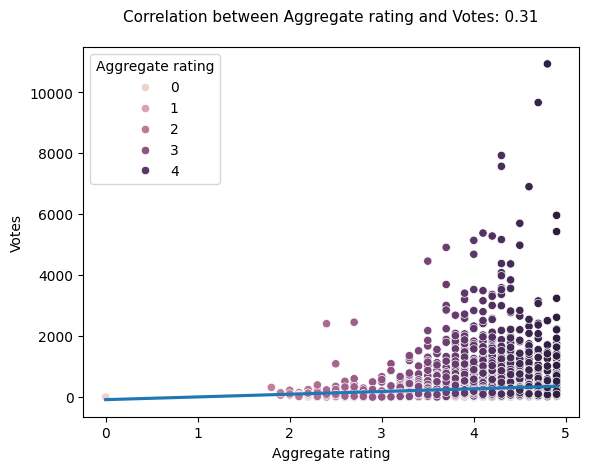

In [34]:
correlation, _ = pearsonr(data['Aggregate rating'], data['Votes']) 
correlation = round(correlation , 2 )

sns.scatterplot(data= data , y = 'Votes' , hue = 'Aggregate rating' , x = 'Aggregate rating' )
sns.regplot(data=data, x='Aggregate rating', y='Votes', scatter=False)
plt.title(f"Correlation between Aggregate rating and Votes: {correlation}\n" , fontdict=dict(size = 11))
plt.show()

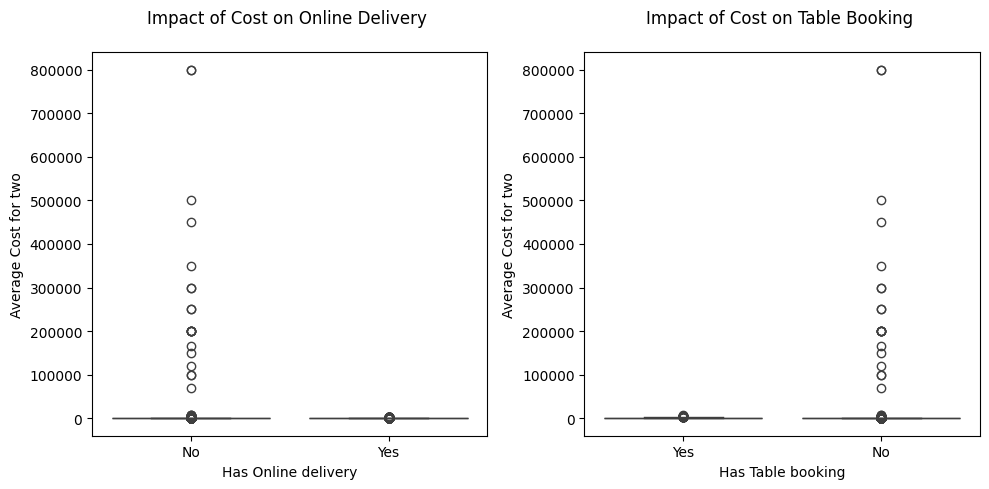

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=data)
plt.xlabel('Has Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Online Delivery \n')

plt.subplot(1,2,2)

sns.boxplot(x='Has Table booking', y='Average Cost for two', data=data )
plt.xlabel('Has Table booking')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Table Booking \n')

plt.tight_layout()
plt.show()

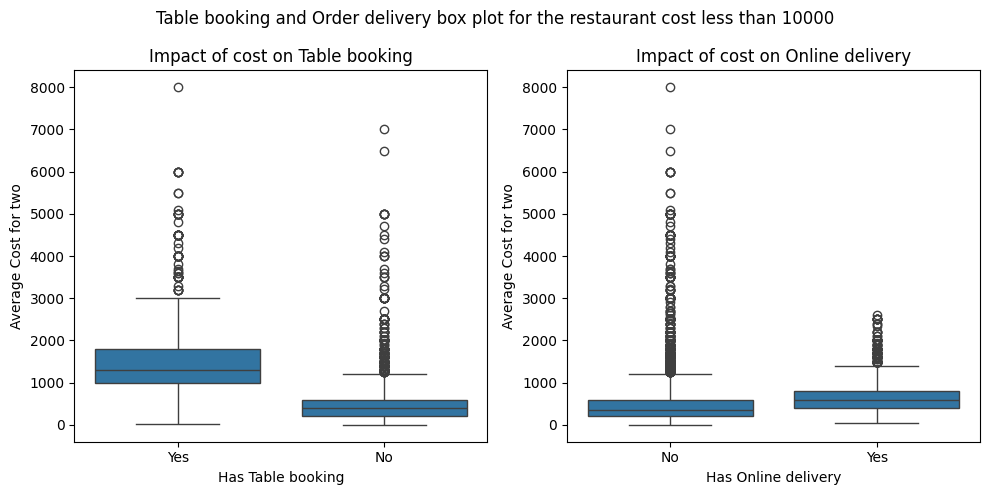

In [36]:
plt.figure(figsize= (10,5))
plt.suptitle('Table booking and Order delivery box plot for the restaurant cost less than 10000')
plt.subplot(1,2,1)
sns.boxplot(x='Has Table booking', y='Average Cost for two', data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of cost on Table booking')
plt.subplot(1,2,2)
sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of cost on Online delivery')
plt.tight_layout()
plt.show()